# Loading libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

# Energy Demand

In [2]:
demand_actual = pd.read_csv('./Data/Demand_Train.csv', header=None)
demand_oracle = pd.read_csv('./Data/Demand_Train_pred.csv', header=None)

### Actual Energy Demand

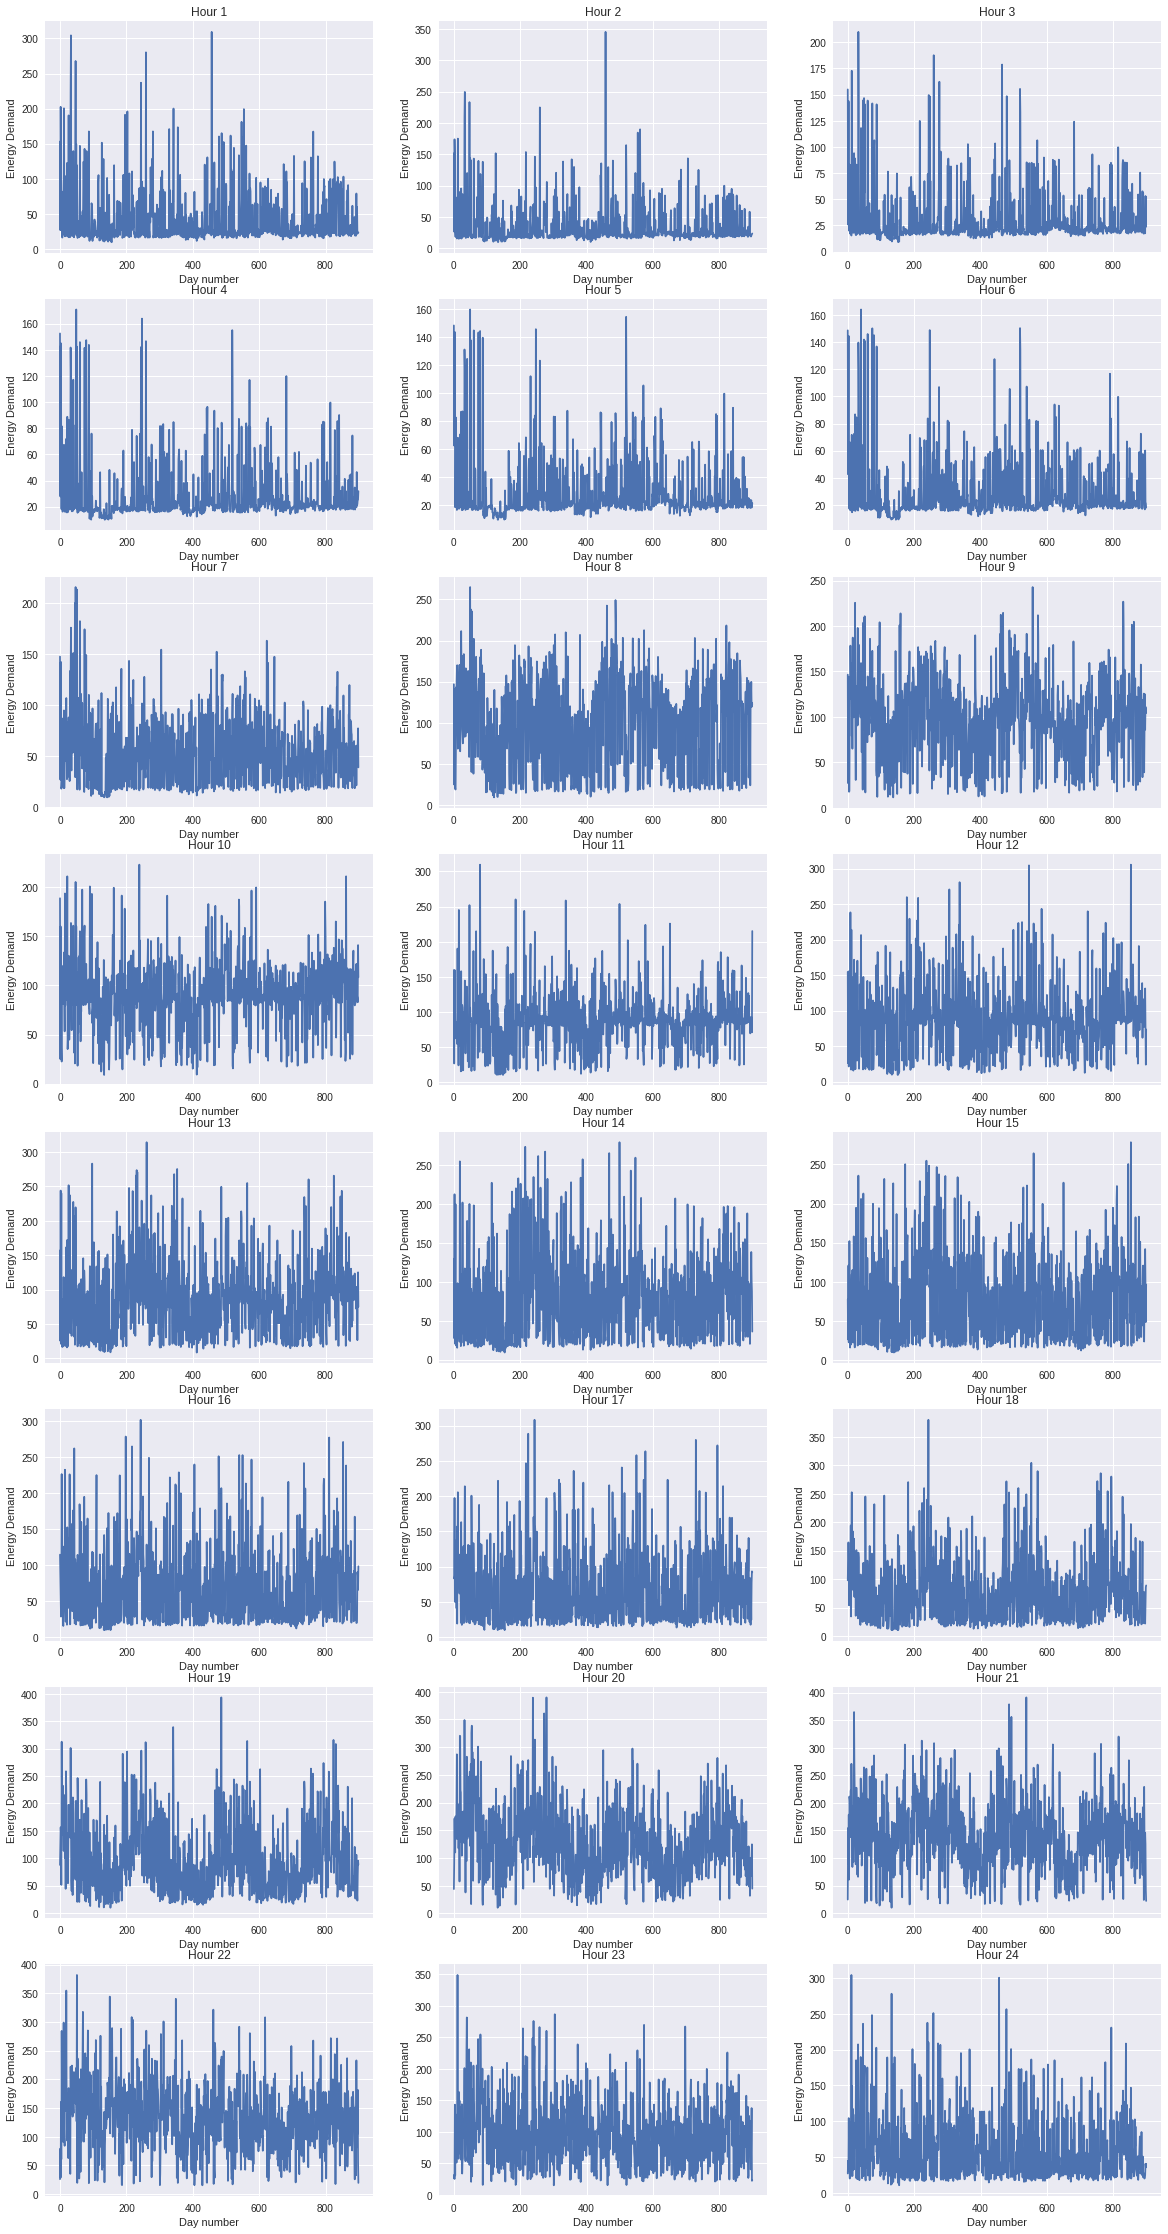

In [3]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Energy Demand')
    plt.plot(demand_actual[i])    

In the above figure, we plot the actual energy demand separately for each hour. We observe that energy demands don't follow any pattern and can't be predicted as a function of time.

### Error in oracle's prediction for demand.

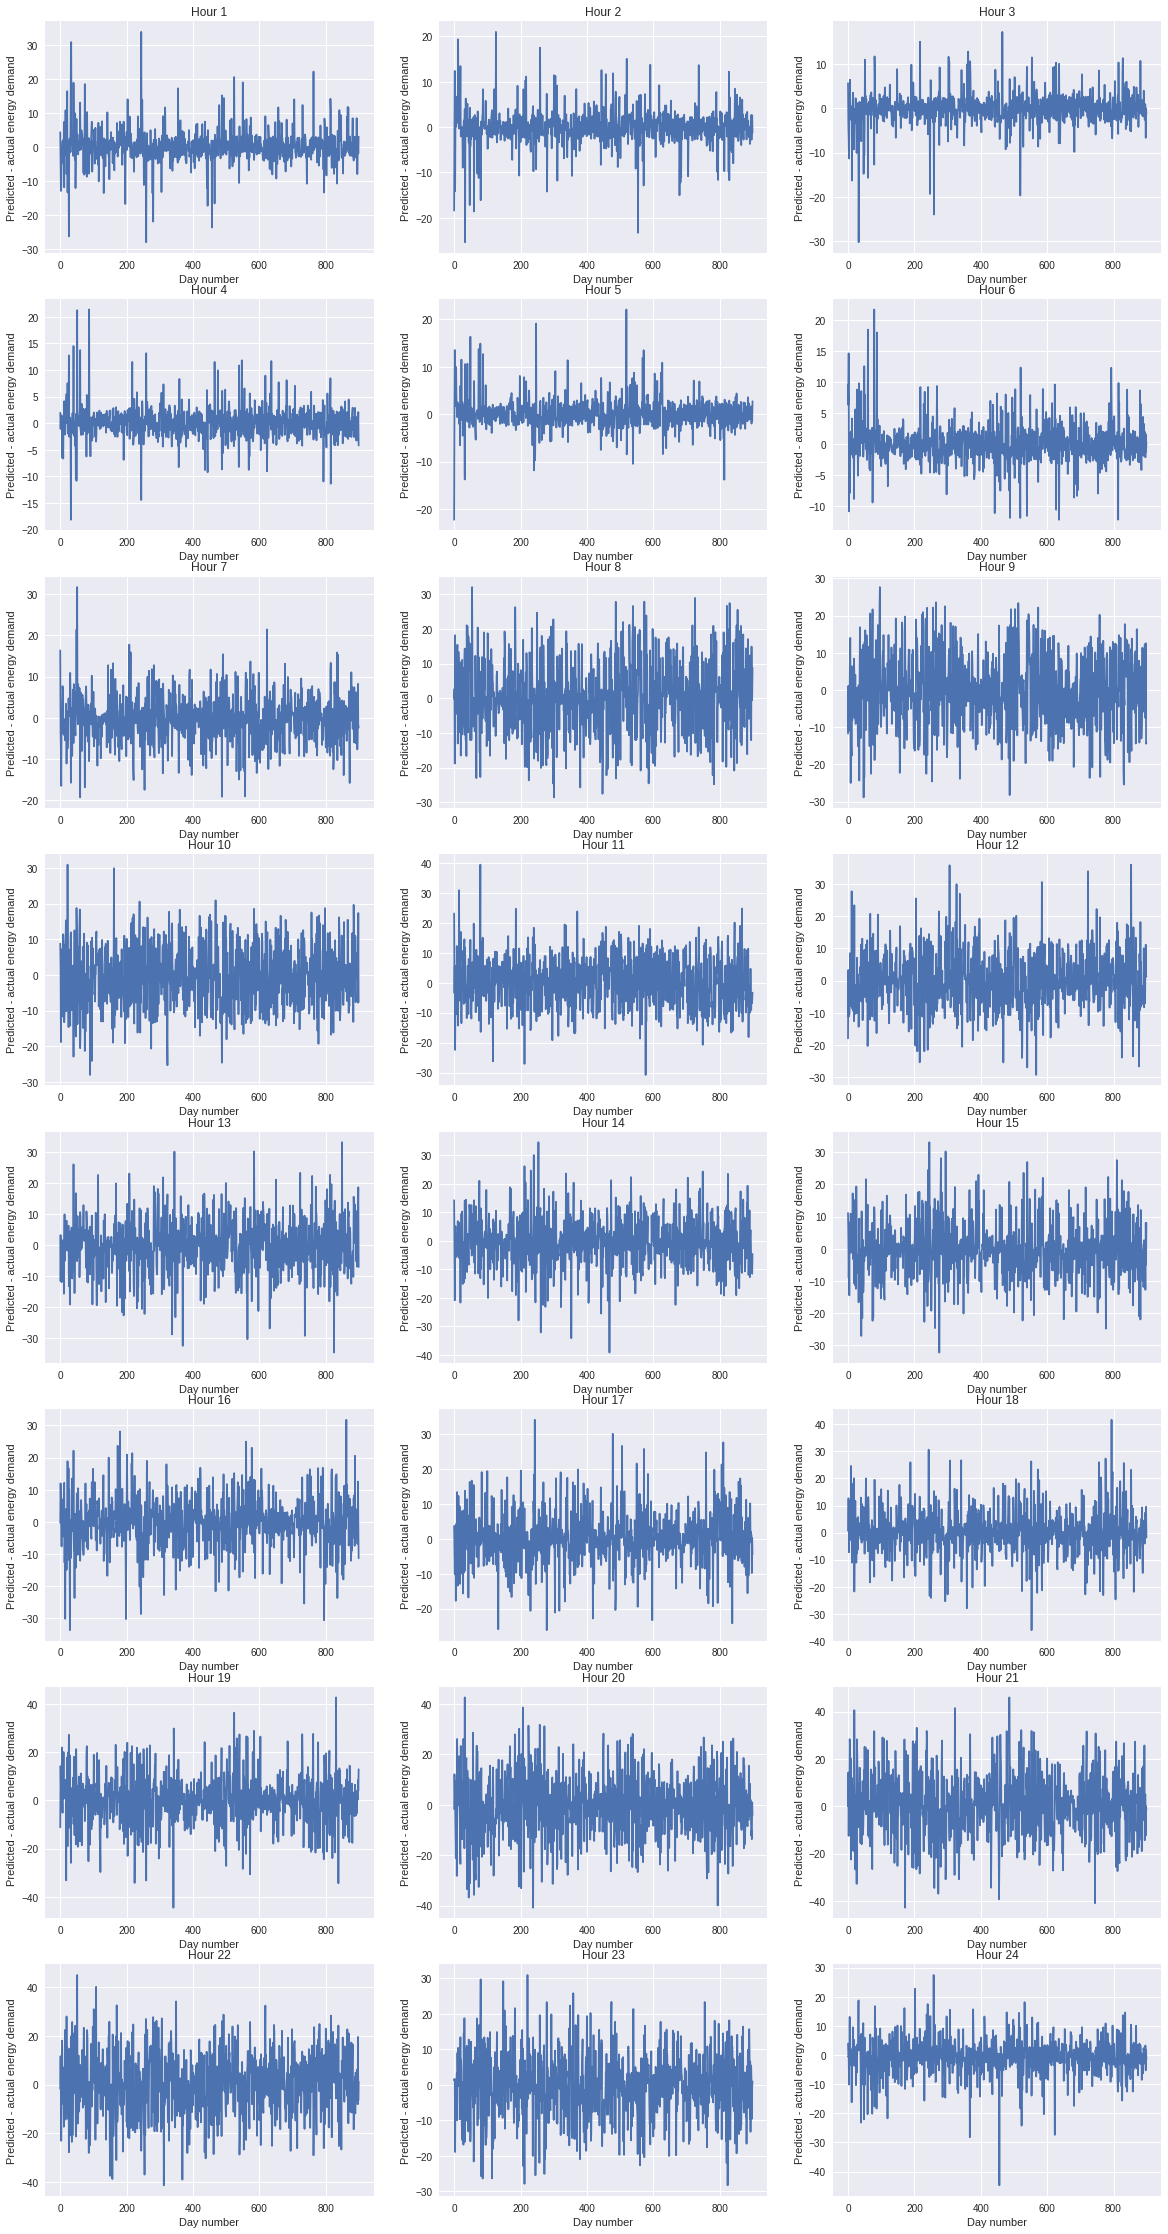

In [4]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Predicted - actual energy demand')
    plt.plot(demand_oracle[i] - demand_actual[i])

In the above figure, we plot the error in oracle's prediction over 900 days separately for each hour. We observe that oracle's predictions are pretty accurate and the error in oracle's prediction is basically random noise. Oracle predicts more and less than the actual value nearly same number of times.

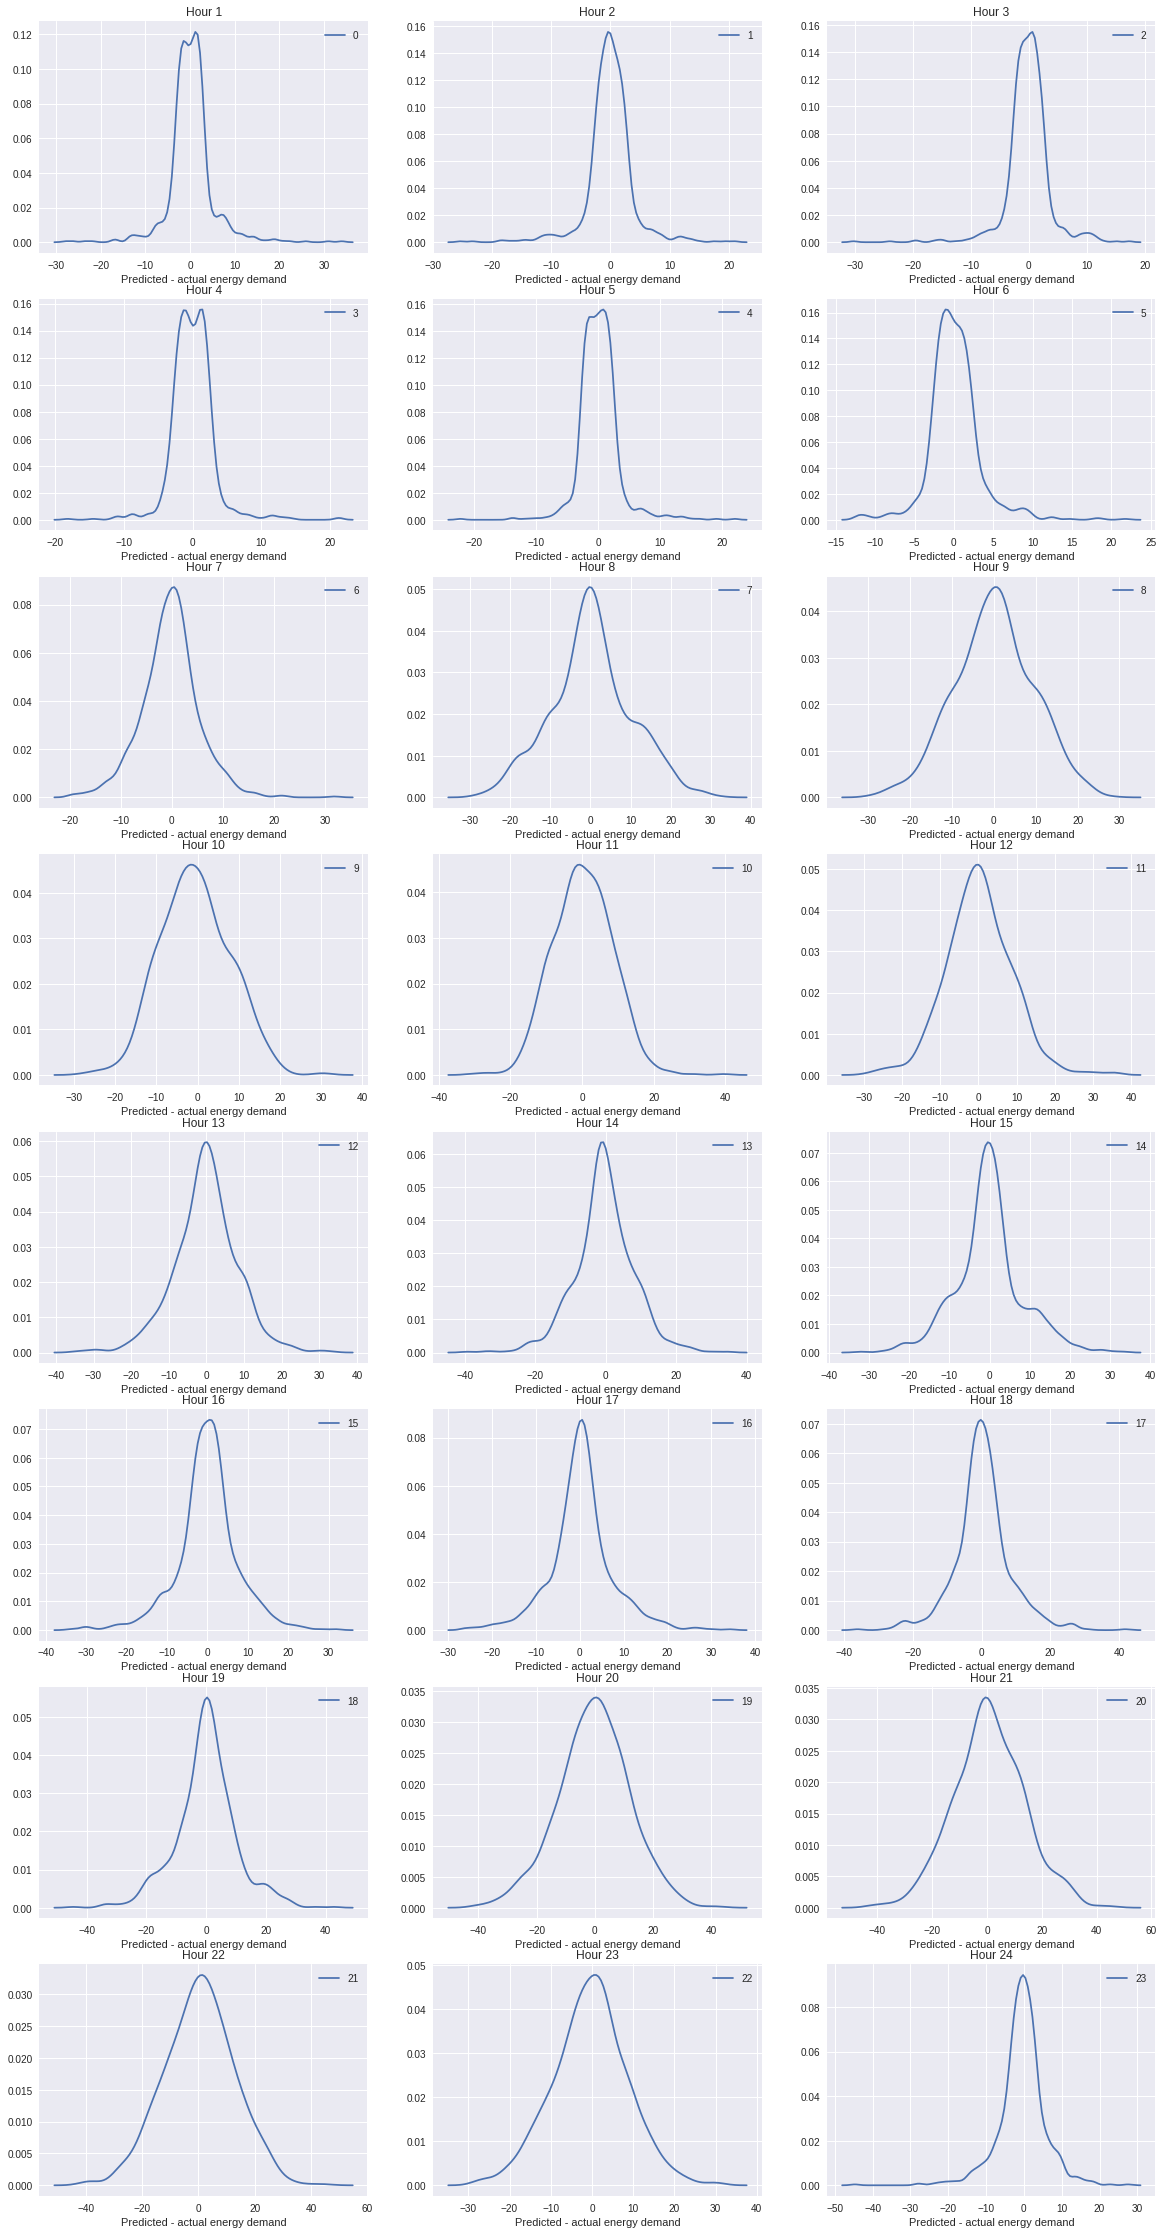

In [5]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Predicted - actual energy demand')
    sns.kdeplot(demand_oracle[i] - demand_actual[i])

As we can see from histogram above the difference between predicted and actual demand is mostly noise which can be approximated as normal distribution with appropriate variance and zero mean.

# Solar output

In [6]:
solar_actual = pd.read_csv('./Data/Solar_Train.csv', header=None)
solar_oracle = pd.read_csv('./Data/Solar_Train_pred.csv', header=None)

### Actual solar output

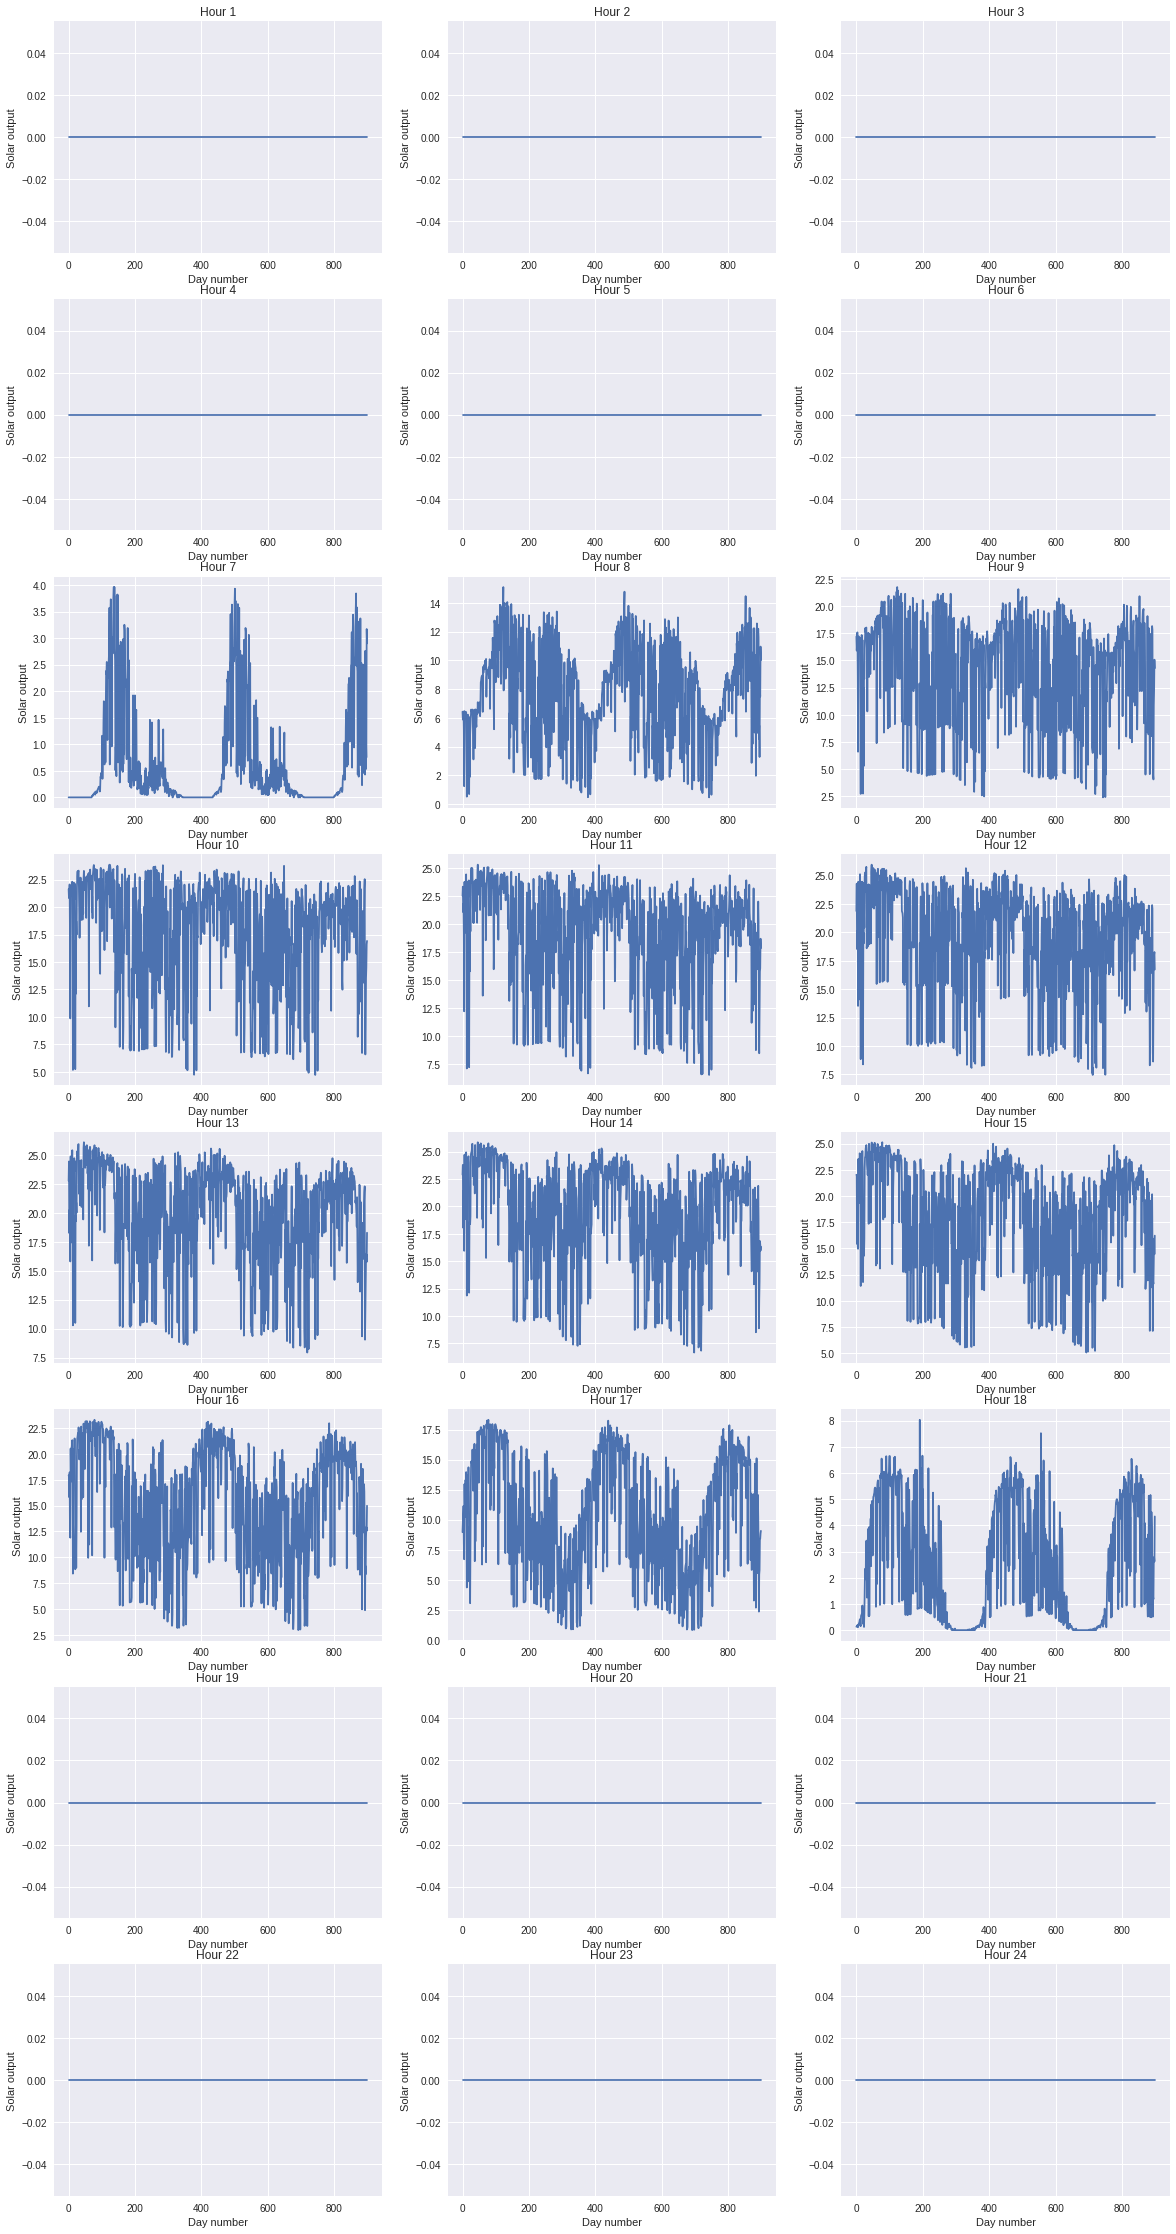

In [7]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Solar output')
    plt.plot(solar_actual[i])    

The above plot follows our expectations. Sunlight in night is as expected zero. Also, hours 7 and 18 receive zero sunlight for some part of year. These days must be in winters.

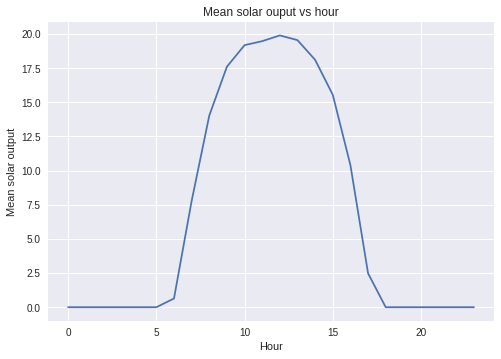

In [8]:
plt.plot(solar_actual.mean())
plt.xlabel('Hour')
plt.ylabel('Mean solar output')
plt.title('Mean solar ouput vs hour')

As expected the solar output increases till Hour 12 and then decreases.

In [9]:
print("Average difference in solar outputs over a year:", solar_actual.diff(365).dropna().mean().mean())

Average difference in solar outputs over a year: -0.3524330218068535


We can see from the above graphs that the solar output is periodic with period of 1 year. This claim is further supported by the fact the average difference between solar ouputs of same date of two consecutive years is very small. Therefore we can predict the solar output with great accuracy.

### Error in oracle's prediction for solar ouput.

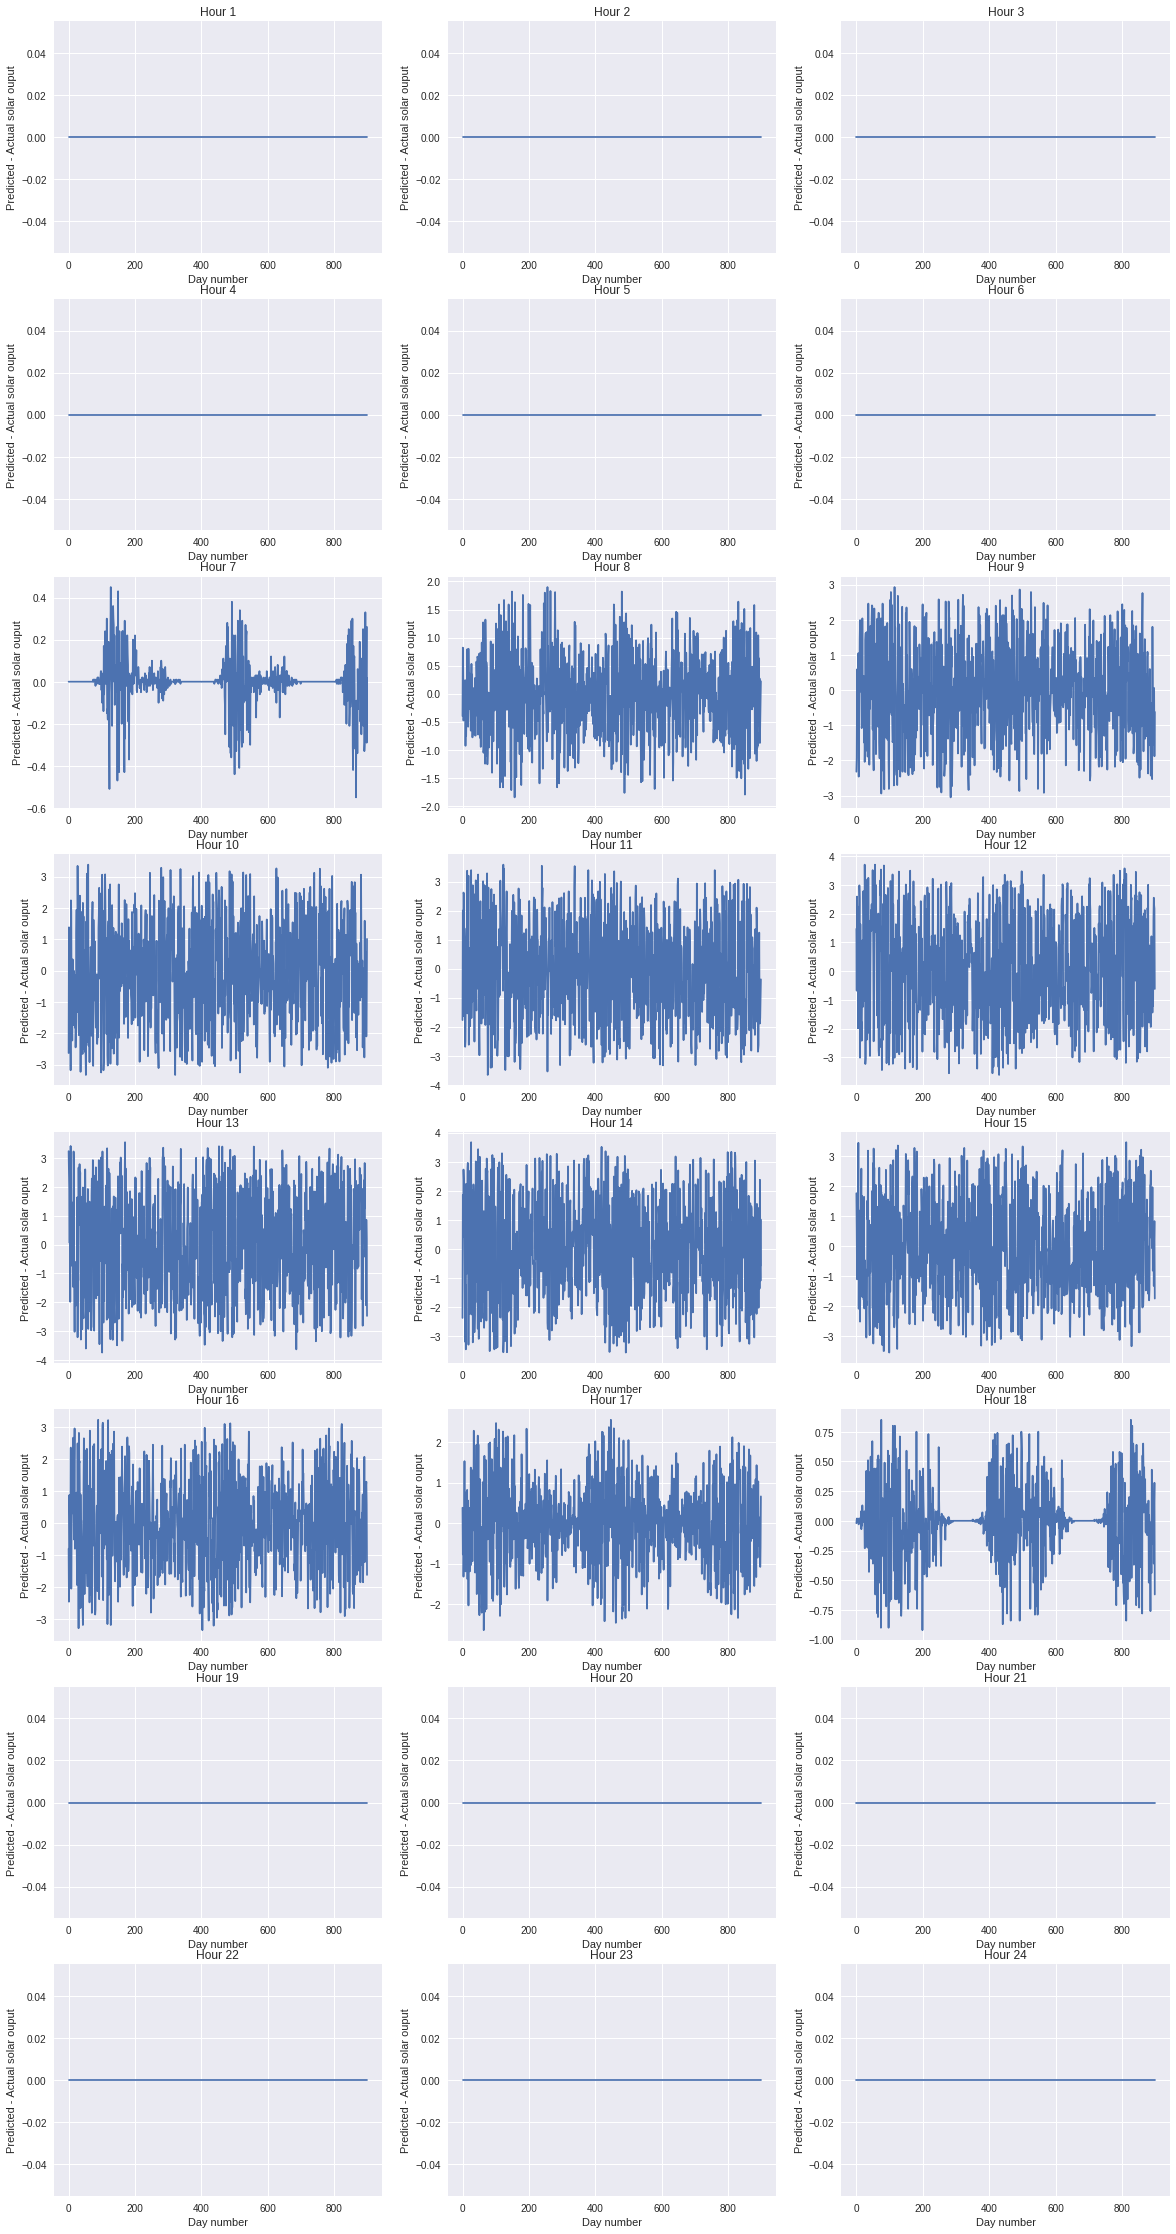

In [10]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Predicted - Actual solar ouput')
    plt.plot(solar_oracle[i] - solar_actual[i])

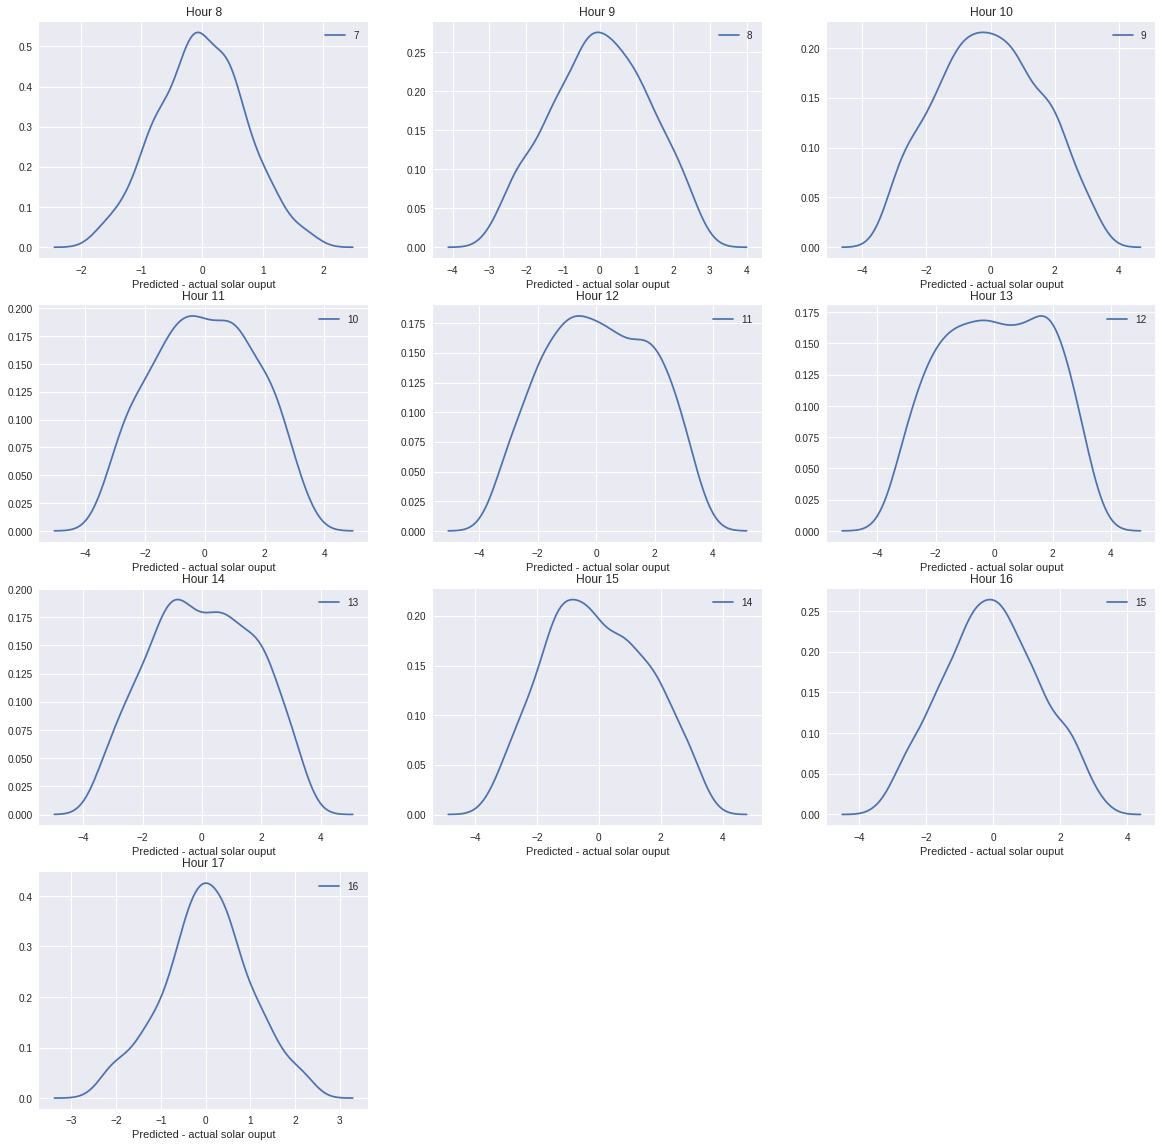

In [11]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(4, 3, i + 1)
    plt.title('Hour ' + str(i + 8))
    plt.xlabel('Predicted - actual solar ouput')
    sns.kdeplot(solar_oracle[i + 7] - solar_actual[i + 7])

Similar to energy demand, the error in oracle's predction for solar ouput is approximately normal with different standard deviations for each hour.

# Market Price

In [12]:
price_actual = pd.read_csv('./Data/Price_Train.csv', header=None)
price_oracle = pd.read_csv('./Data/Price_Train_pred.csv', header=None)

### Actual Market price

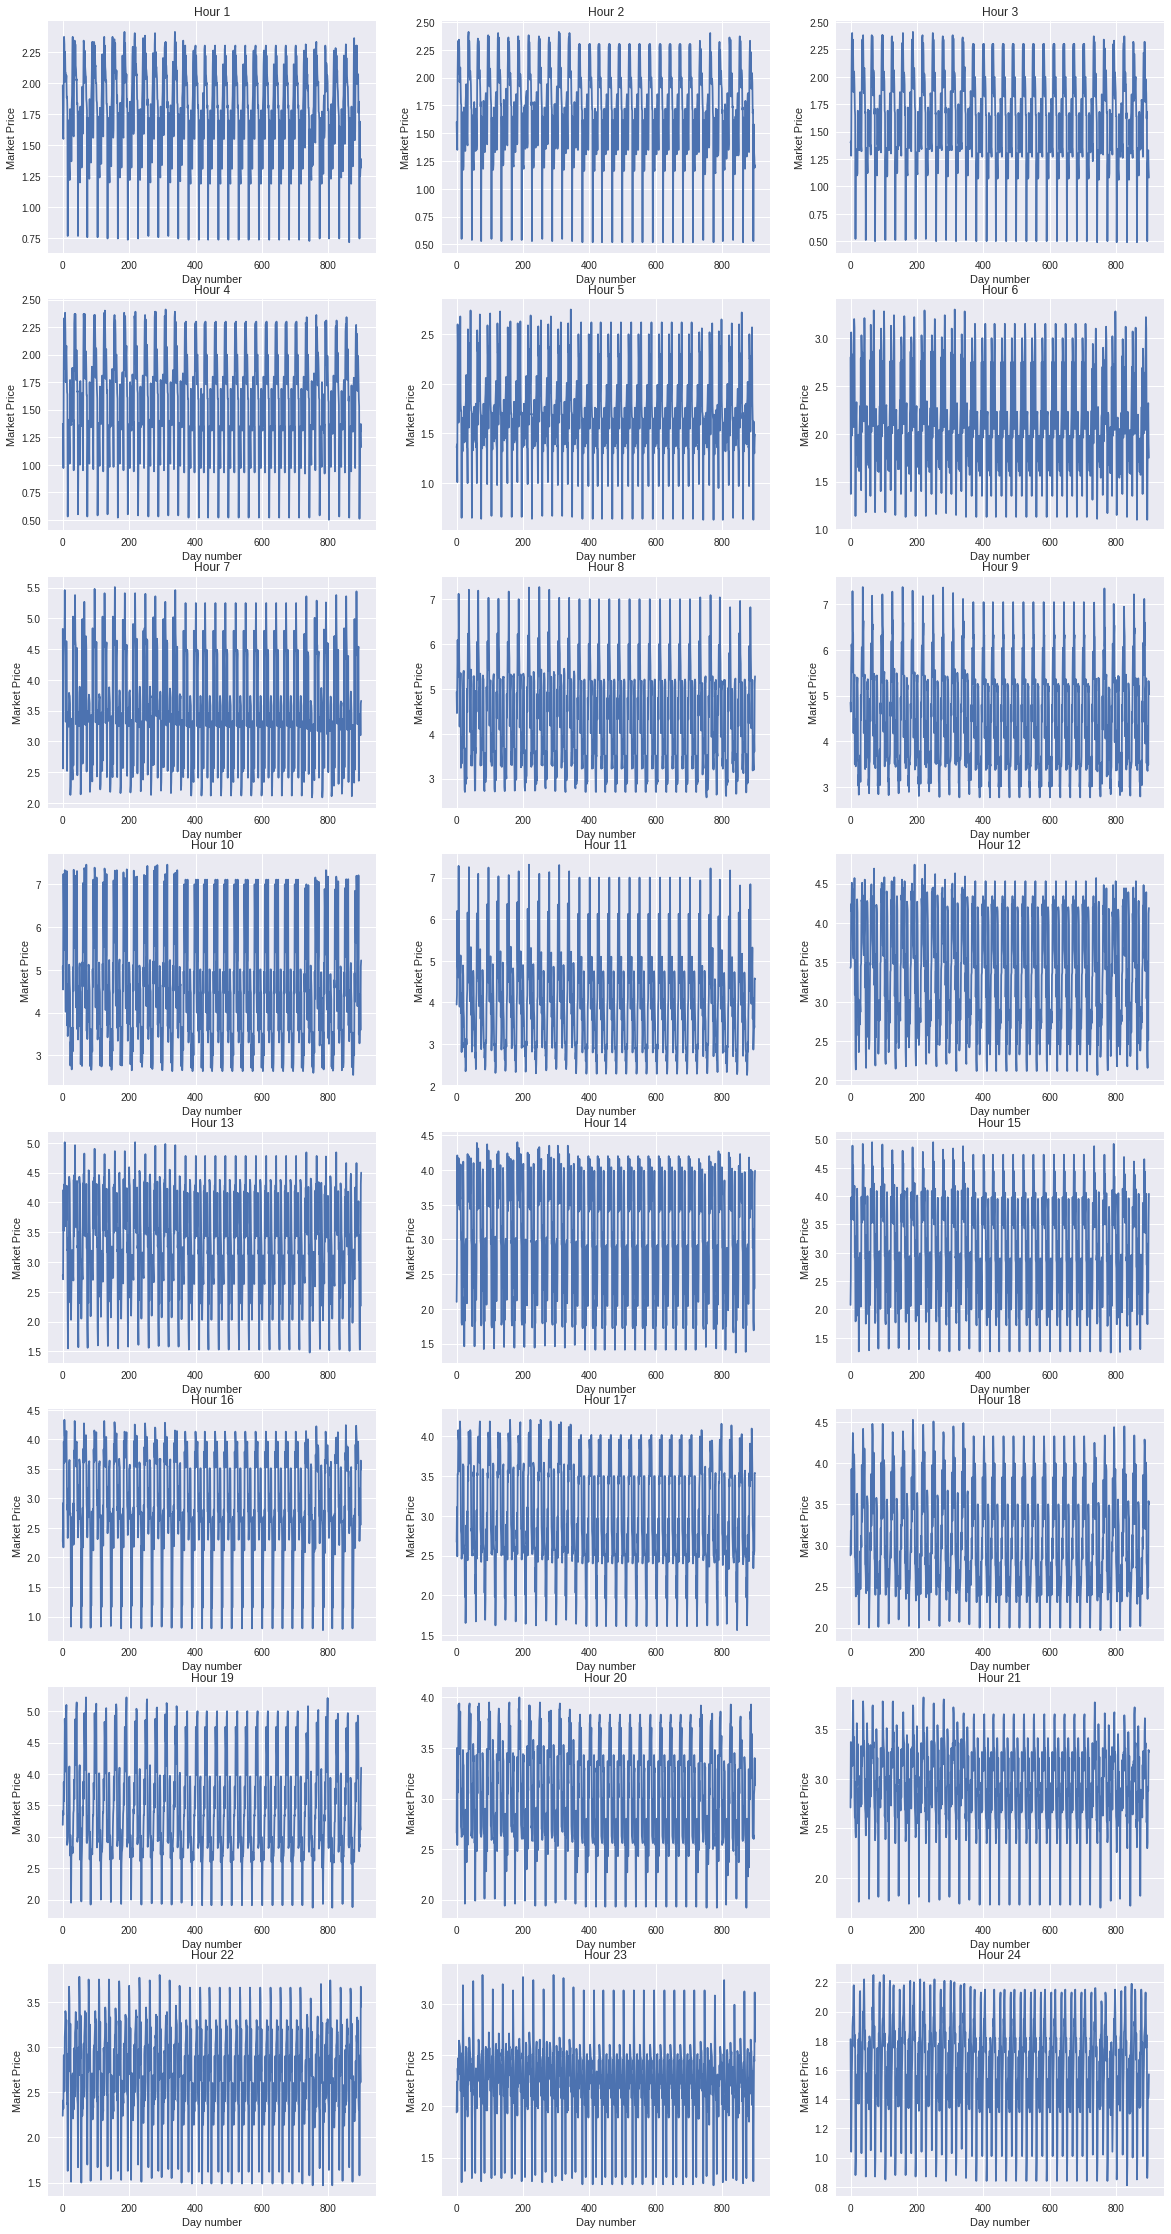

In [13]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Market Price')
    plt.plot(price_actual[i])    

We can see that market prices are periodic. Considering one hour specificly,

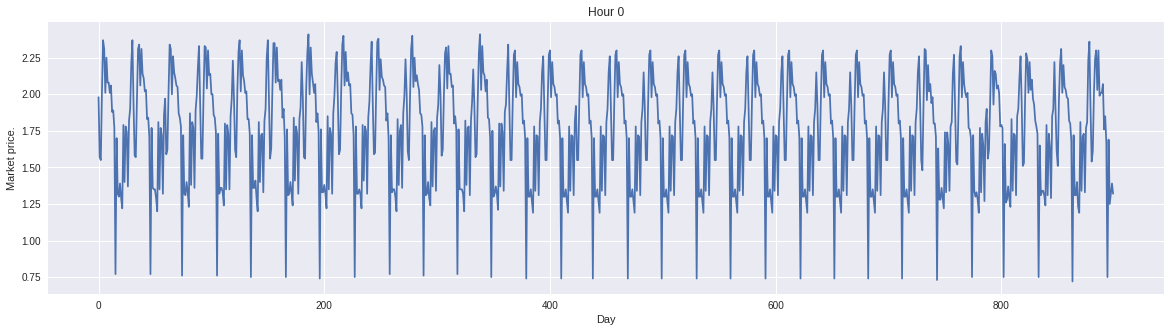

In [14]:
plt.figure(figsize=(20,5))
plt.title('Hour 0')
plt.xlabel('Day')
plt.ylabel('Market price.')
plt.plot(price_actual[0])

We can clearly see that the market prices are periodic. We now find out the time period,

In [15]:
# min_spike_day corresponds to the day in above figure when price drops suddenly
min_spike_day = list(price_actual[0][price_actual[0] < 0.8].index)
time_period = []
for i in range(len(min_spike_day) - 1):
    time_period.append(list(min_spike_day)[i + 1] - min_spike_day[i])
print(time_period)

[31, 28, 31, 30, 31, 30, 31, 31, 30, 30, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 30, 30, 31, 31, 28, 31, 30, 31]


Suprisingly, the time period is the number of days of a month. That is, on a particular date of the month the market price drops drastically and this trend is consistent for the period of two years. This trend is further verified by the following figure.

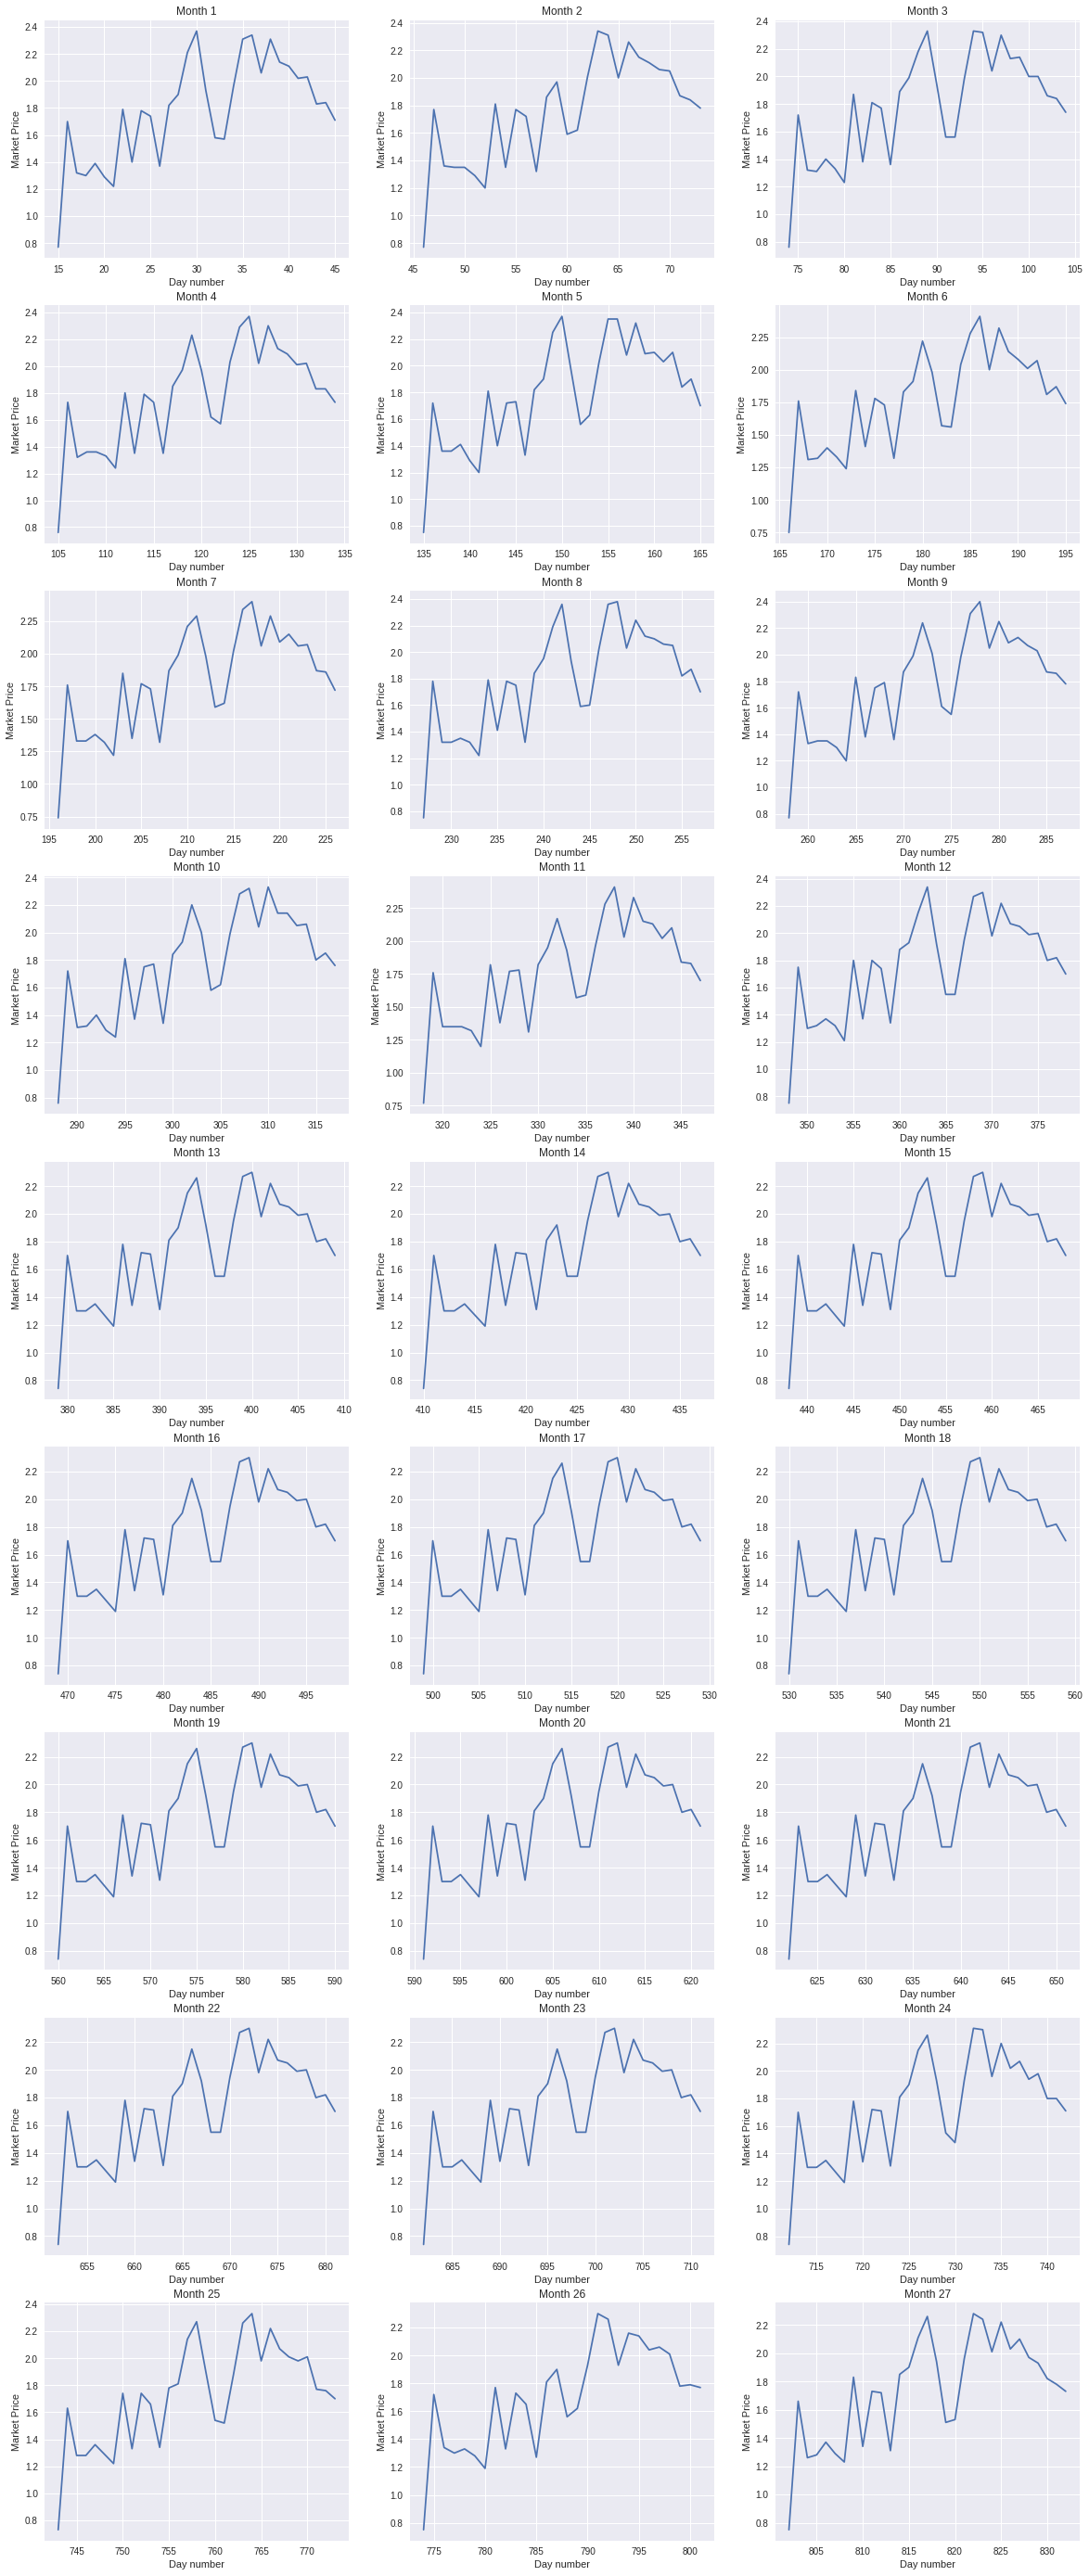

In [16]:
start = 15
plt.figure(figsize=(20,50))
for i in range(27):
    plt.subplot(9, 3, i + 1)
    plt.title('Month ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Market Price')
    plt.plot(price_actual[0][start:start + time_period[i]])
    start = start + time_period[i]

Therefore we can very accurately predict the market price using the perfecly periodic nature of market prices.

### Error in oracle's prediction for market price

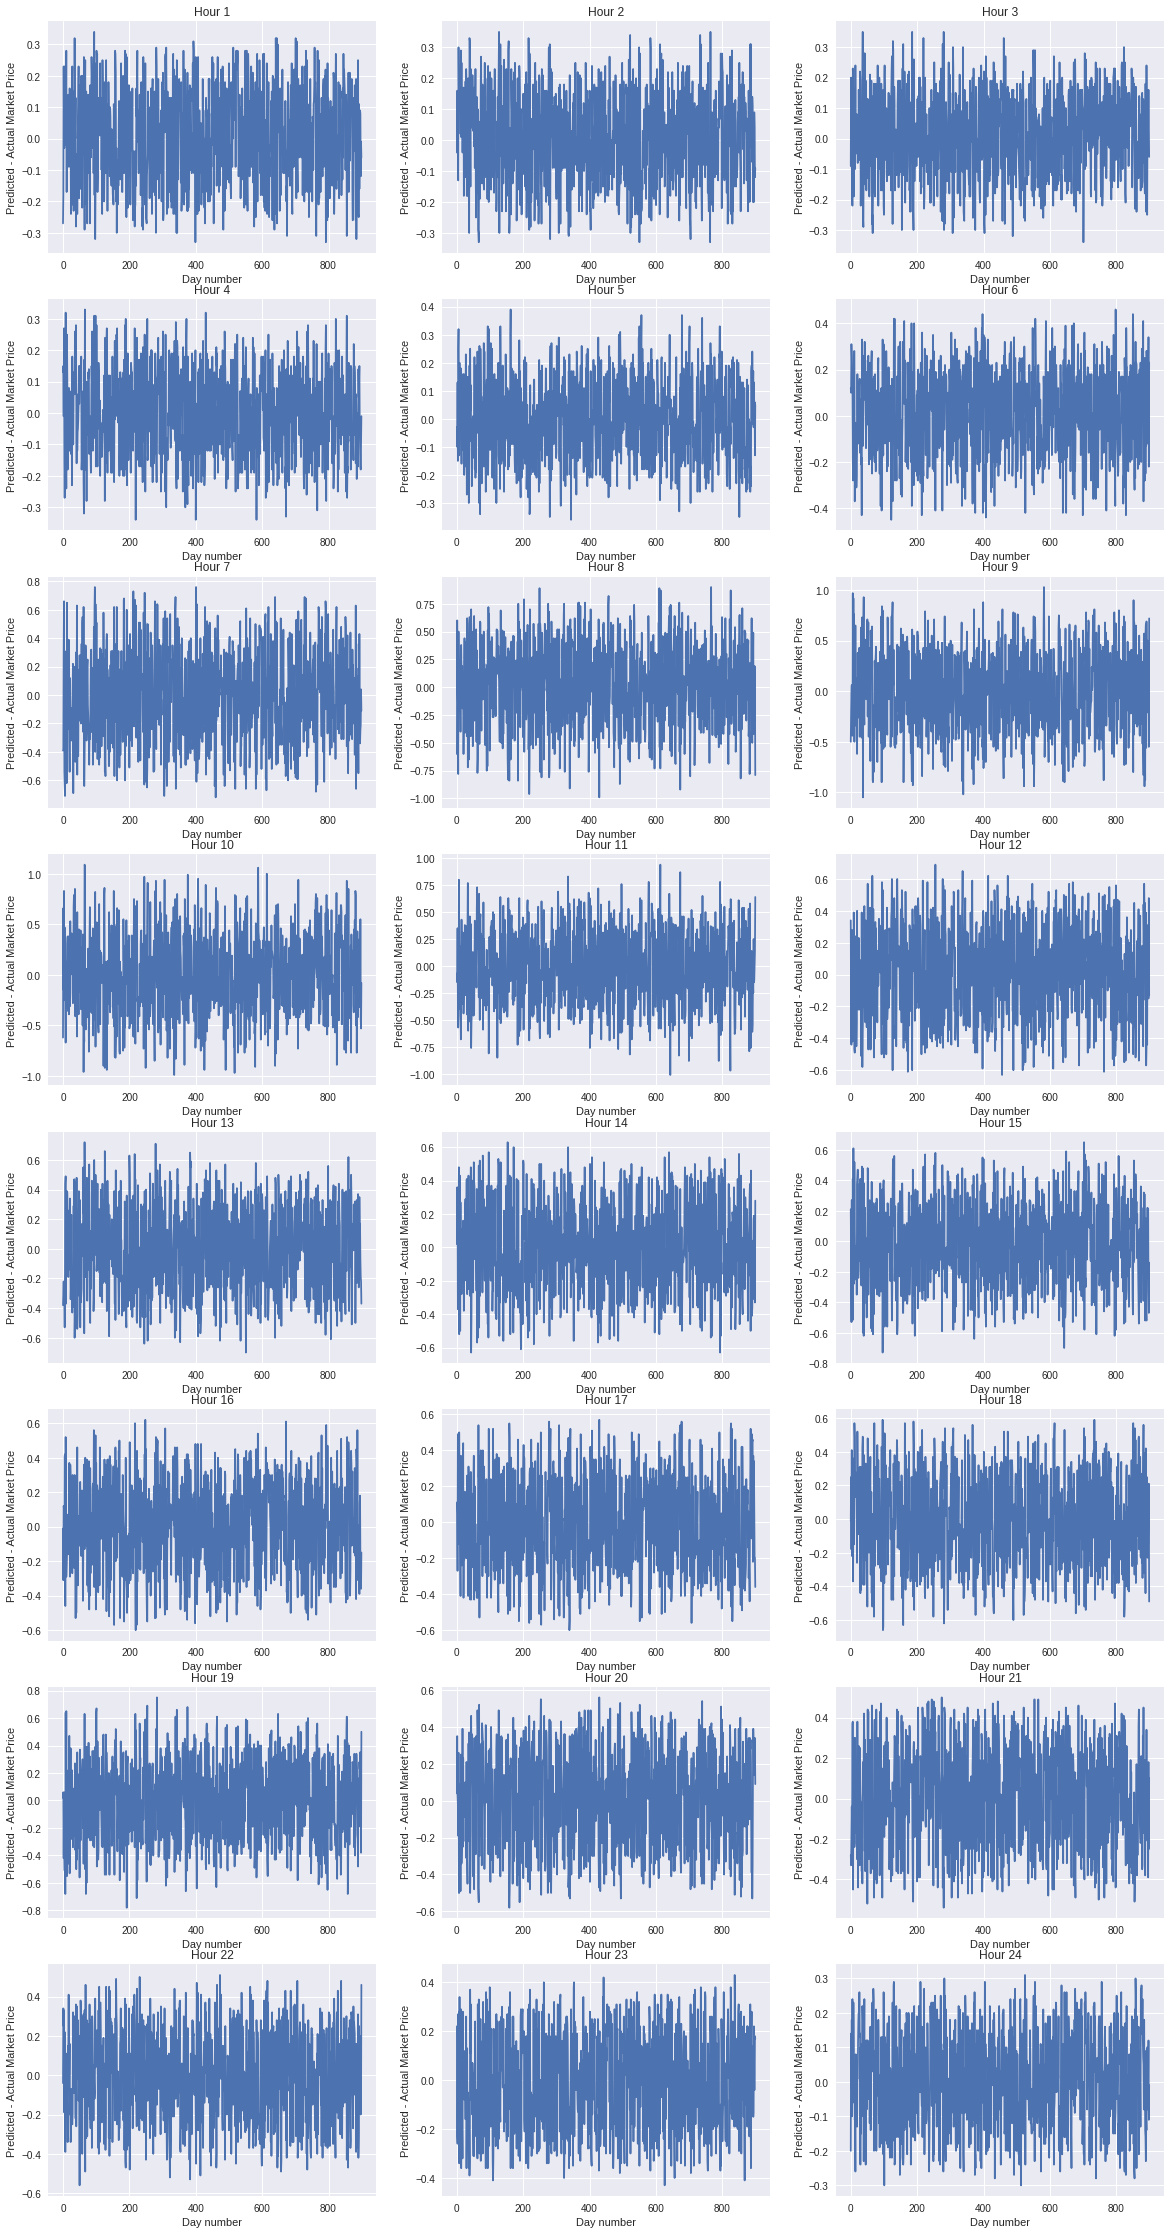

In [17]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Predicted - Actual Market Price')
    plt.plot(price_oracle[i] - price_actual[i])    

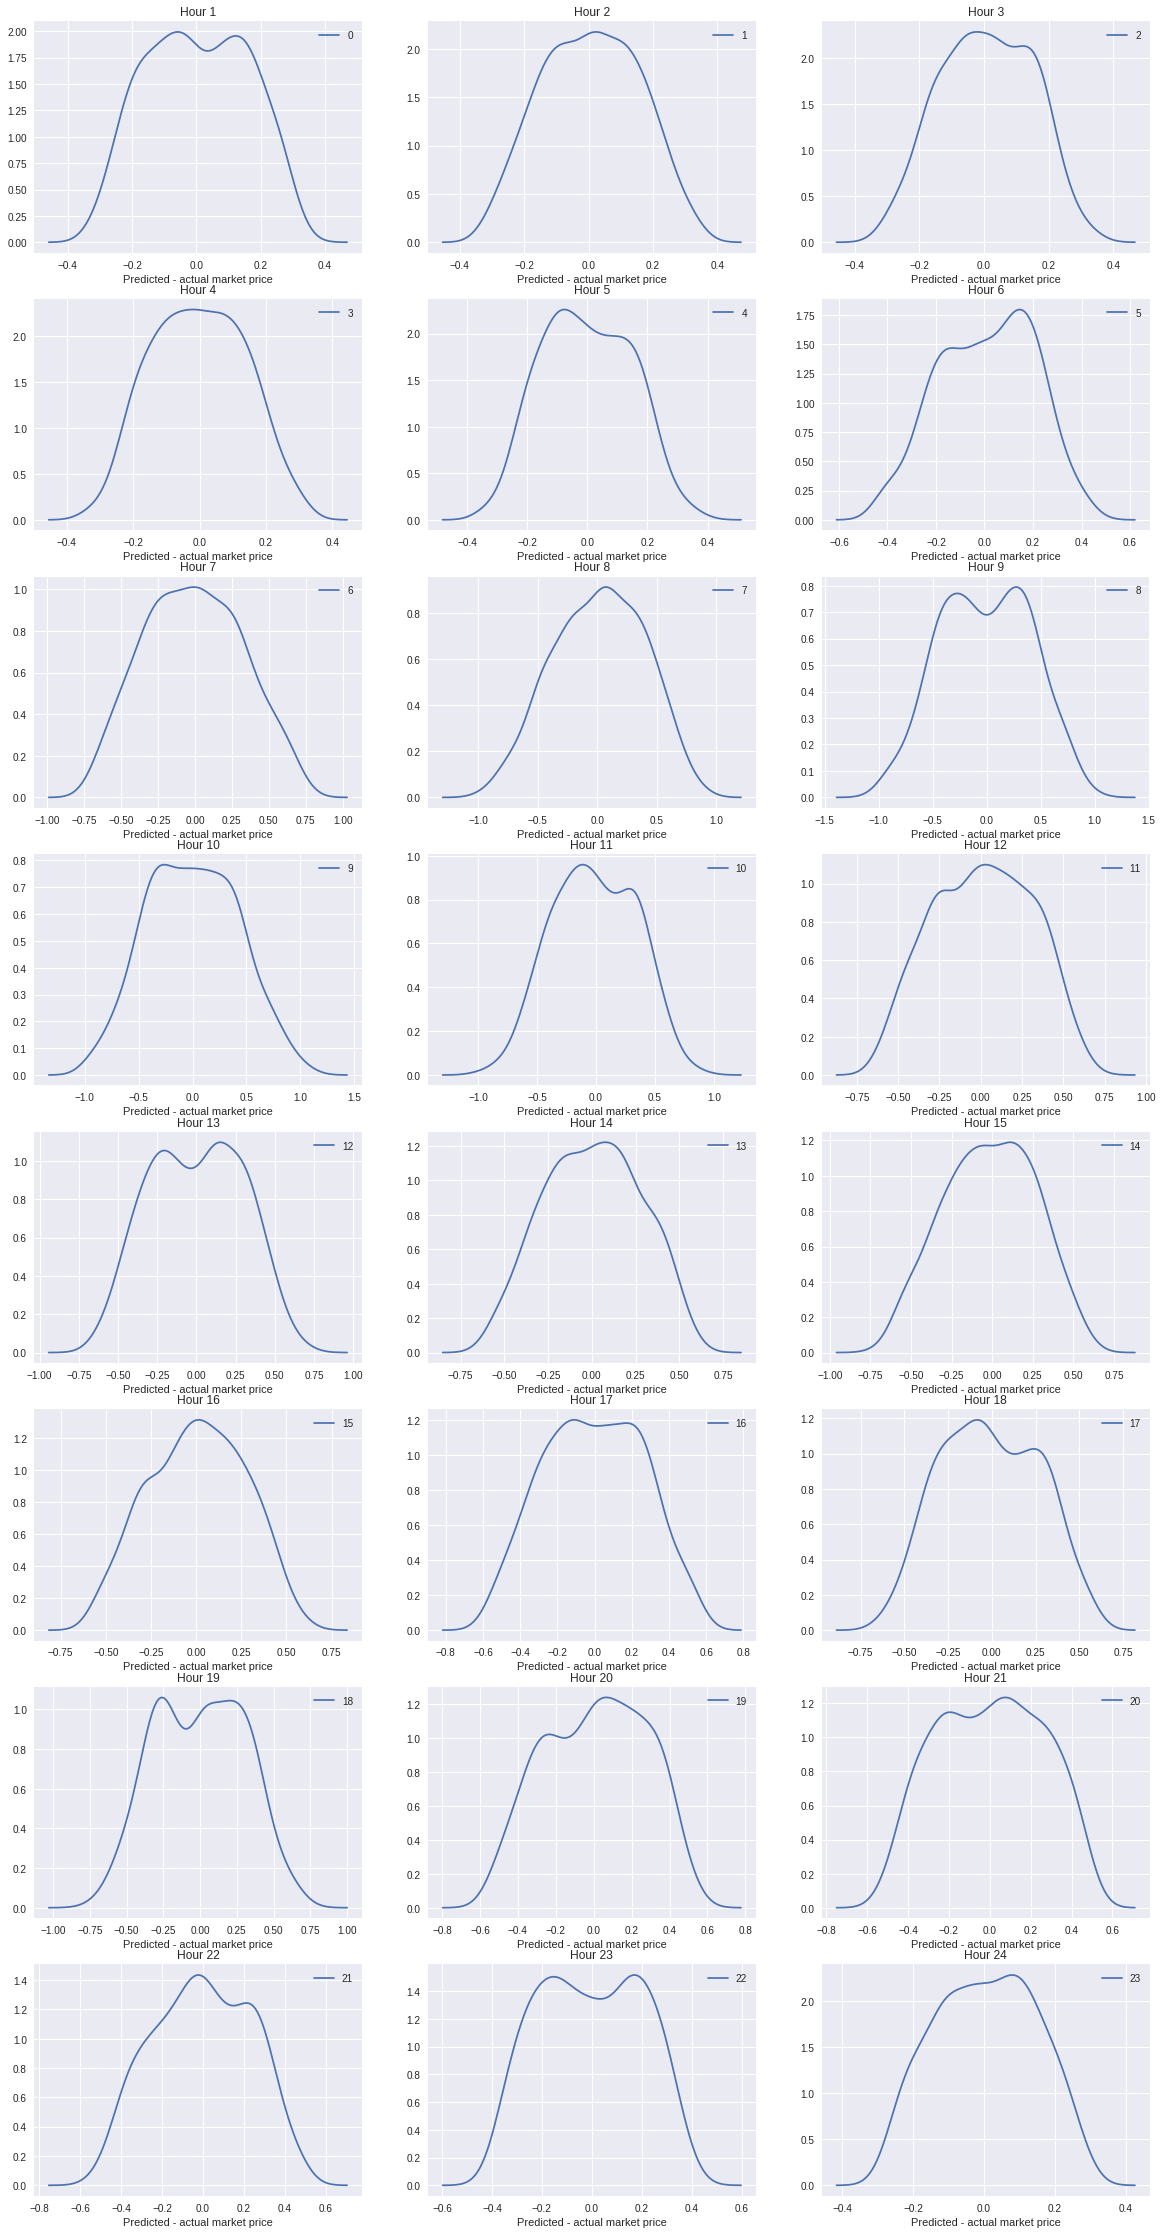

In [18]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Predicted - actual market price')
    sns.kdeplot(price_oracle[i] - price_actual[i])

The predicted market prices are not very useful here as we are completely able to determine them using previous market prices.

In the above analysis we have seen that we can predict market price and solar output with very good accuracy, and the energy demand with a good accuracy.